# Assignment 8
Linda Koine, Jens Weimann, Markus Wiktorin

## 1

In [1]:
from IPython.display import Image
#Image("...")

## 2

## 3

In [2]:
import neurolab as nl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def func1(x):
    return 1/x

def func2(x):
    return np.log10(x)

def func3(x):
    return np.exp(-x)

def func4(x):
    return np.sin(x)

In [4]:
class mapping:
    def __init__(self, function, range_, str_):
        self.function = function
        self.range_ = range_
        self.str = str_
        
    def generate_set(self, size):
        result = []
        for i in range(size):
            x = np.random.random() * (self.range_[1] - self.range_[0]) + self.range_[0]
            result.append(np.array([x, self.function(x)]))
        return np.array((result))

In [5]:
def get_error(net, test_set):
    error = 0
    for test in test_set:
        error = error + abs(test[1] - net.sim(np.array([[test[0]]])))[0][0]
    return error / np.size(test_set, 0)

In [69]:
class RadBasis:
    # output range
    out_minmax = [-1, 1]
    # input active range
    inp_active = [-2, 2]

    def __init__(self, center):
        self.center = center
    
    def __call__(self, x):
        return (x - self.center)**2

    def deriv(self, x, y):
        return 2 * x - 2 * self.center

In [70]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

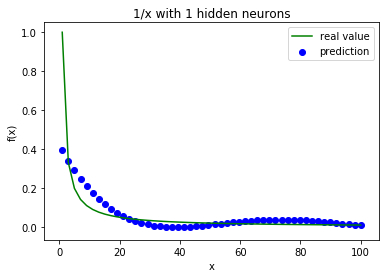

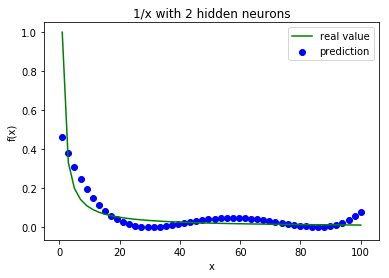

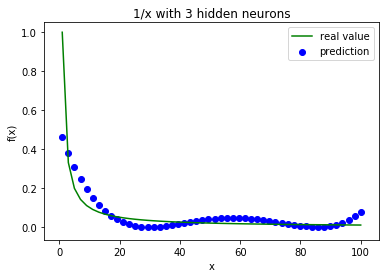

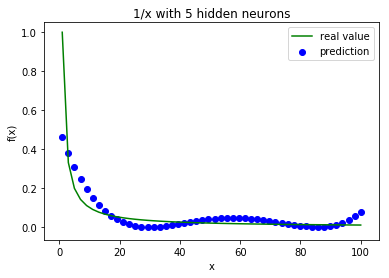

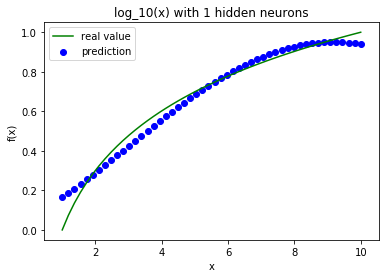

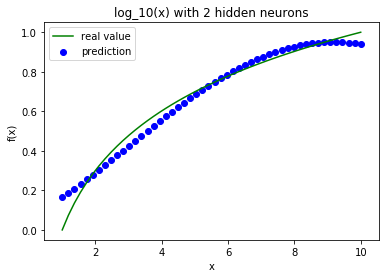

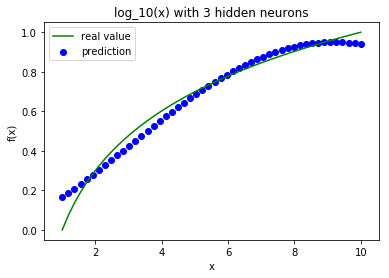

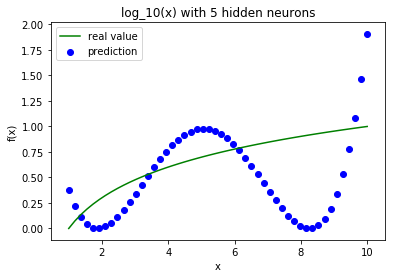

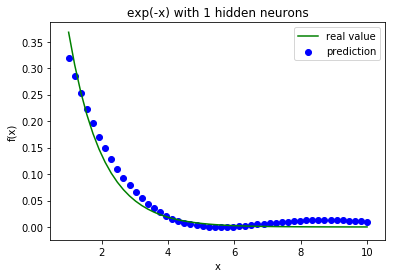

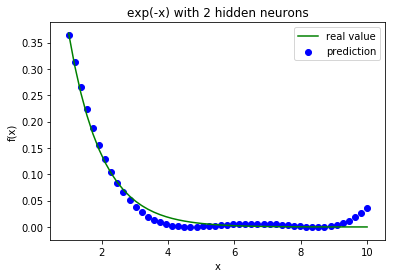

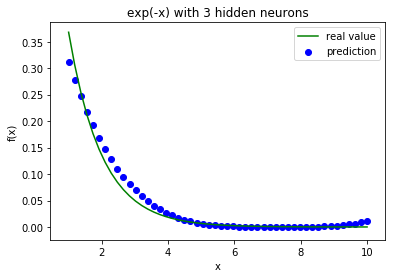

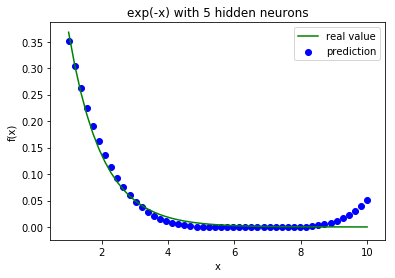

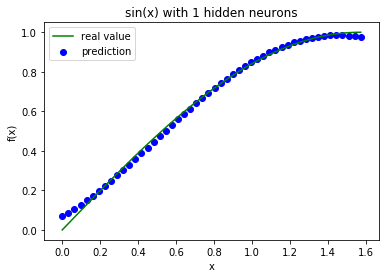

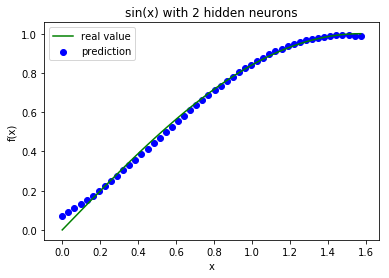

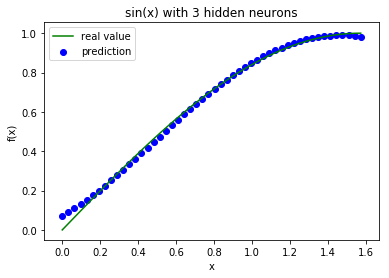

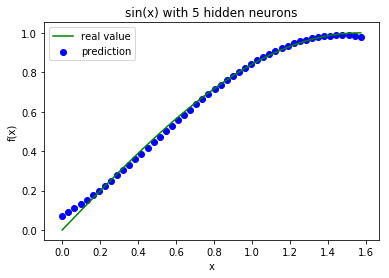

In [80]:
training_size = 100
test_size = 50
hidden_neurons = [1, 2, 3, 5]

mappings = []
mappings.append(mapping(func1, [1,100], "1/x"))
mappings.append(mapping(func2, [1,10], "log_10(x)"))
mappings.append(mapping(func3, [1,10], "exp(-x)"))
mappings.append(mapping(func4, [0, np.pi / 2], "sin(x)"))

for m in mappings:
    training_set = m.generate_set(training_size)
    input = training_set[:,0].reshape(training_size, 1)
    target = training_set[:,1].reshape(training_size, 1)
    
    errors = np.zeros((len(hidden_neurons), 1))
    
    for num_hidden_neurons in hidden_neurons:
        net = nl.net.newff([m.range_], [num_hidden_neurons,1], transf=[RadBasis(np.mean(input)), RadBasis(np.mean(input))])
        net.train(input, target, epochs=training_size, show=0)
        predictions = []
        space = np.linspace(m.range_[0], m.range_[1], test_size)
        for x in space:
            predictions.append(net.sim(np.array([[x]])))

        plt.figure()
        plt.plot(space, m.function(space), c="g")
        plt.scatter(space, np.array(predictions), c="b")
        plt.title(m.str + " with " + str(num_hidden_neurons) + " hidden neurons")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.legend(["real value", "prediction"])